## SVM V2 Classifier

This script will do simple 2 classification task for L80 V2 data.  
It might be possible for other data sets, but detail need to be on discussion.
___

In [1]:
import Common_Functions as cf
from OI_Functions.Map_Subtractor import Sub_Map_Generator
from OI_Functions.VDaQ_dRR_Generator import BLK2DRR
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd



wp = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI'
# get run folder of G8 and RGLunm Run.
orien_folder = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8'
color_folder = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run12_RGLum4'



___
First, use standard data processor get dR/R Matrix, transfer data into python-readable data type.

In [2]:
orien_reader = BLK2DRR(orien_folder)
orien_reader.Read_All_Frames()
orien_reader.dR_R_Calculator(base_frame=[0,1],save=True)
color_reader = BLK2DRR(color_folder)
color_reader.Read_All_Frames()
color_reader.dR_R_Calculator(base_frame=[0,1],save=True)

___
Second, for this task, we need Orientation and Color Tunings. So A-O,H-V and RG-Lum graph is required for tuning calculation.  
*There will be better method for tuning estimation. But here we use the simplest one.(Use ttest maps)*

All Condition ID Names:dict_keys([-1, 1, 2, 3, 4, 5])
Folder D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method already exists!
All Condition ID Names:dict_keys([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Folder D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method already exists!
Folder D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method already exists!


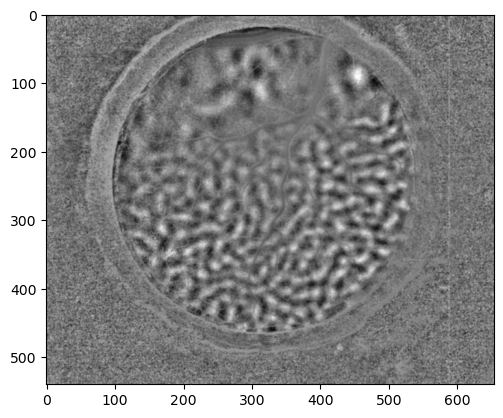

In [5]:
color_drr = cf.Load_Variable(r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run12_RGLum4\Processed\dRR_Dictionaries.pkl')
calculator = Sub_Map_Generator(color_drr)
rglum,rg_raw_drr,rg_filted_drr,p_rg = calculator.Get_Map([1,2],[3,4],clip_value = 5,savepath = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method',filter_flag=True,HP_sigma=20,LP_sigma=0.75,graph_name = 'RG-Lum')
# sns.heatmap(flited_drr,center = flited_drr.mean(),square = True) # Q-check

## then AO and HV
orein_drr = cf.Load_Variable(r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8\Processed\dRR_Dictionaries.pkl')
calculator = Sub_Map_Generator(orein_drr)
ao,ao_raw_drr,ao_filted_drr,p_ao = calculator.Get_Map([2,6],[4,8],clip_value = 5,savepath = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method',filter_flag=True,HP_sigma=20,LP_sigma=0.75,graph_name = 'A-O')
# sns.heatmap(flited_drr,center = flited_drr.mean(),square = True)

hv,hv_raw_drr,hv_filted_drr,p_hv = calculator.Get_Map([1,5],[3,7],clip_value = 5,savepath = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method',filter_flag=True,HP_sigma=20,LP_sigma=0.75,graph_name = 'H-V')
# sns.heatmap(flited_drr,center = flited_drr.mean(),square = True)

**Attention the difference and effect of filter. Graph after and before filt can be very different on absolute value.**

Text(0.5, 1.0, 'HP Filted H-V')

<Figure size 640x480 with 0 Axes>

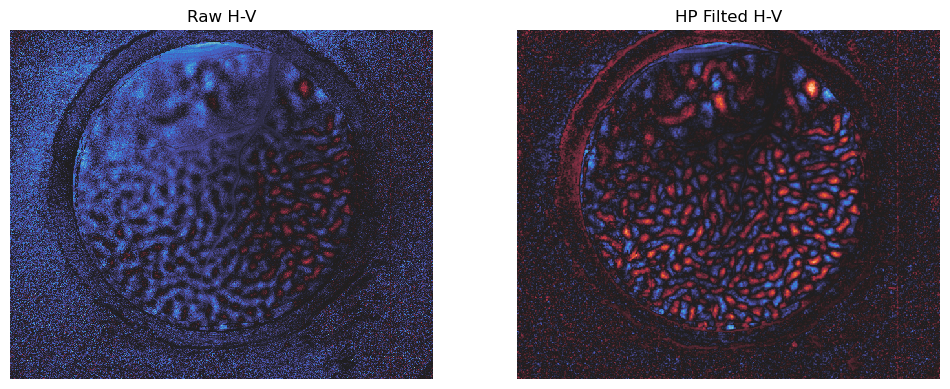

In [16]:
# use hv graph as an example.
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.heatmap(hv_raw_drr,center = 0,square = True,ax = ax[0],xticklabels=False,yticklabels=False,cbar = False)
sns.heatmap(hv_filted_drr,center = 0,square = True,ax = ax[1],xticklabels=False,yticklabels=False,cbar = False)
# center = 0, as filted graph to be 0.
ax[0].set_title('Raw H-V')
ax[1].set_title('HP Filted H-V')


___
##### Step 3, we will use these 3 graph to generate orientation and color tuning.   
Plot tuning by location. This part can be surely refined.   
Use clip and normalize to get standarized tuning, so this might be useful for other data sets.

___
Step 4, we will use masks to generate orien and color tuning index matrix, and use manuall mask to get data distribution of these 2 graphs.

___
Step 5, train SVM. Plot svm test dataset and determine function.  
Unlinear svm might work better, and paras can be refined too.   
This wokrs fairly good.

___
Step 6, recover classied data to 2D space.   
Classified graph together with prob. graph.